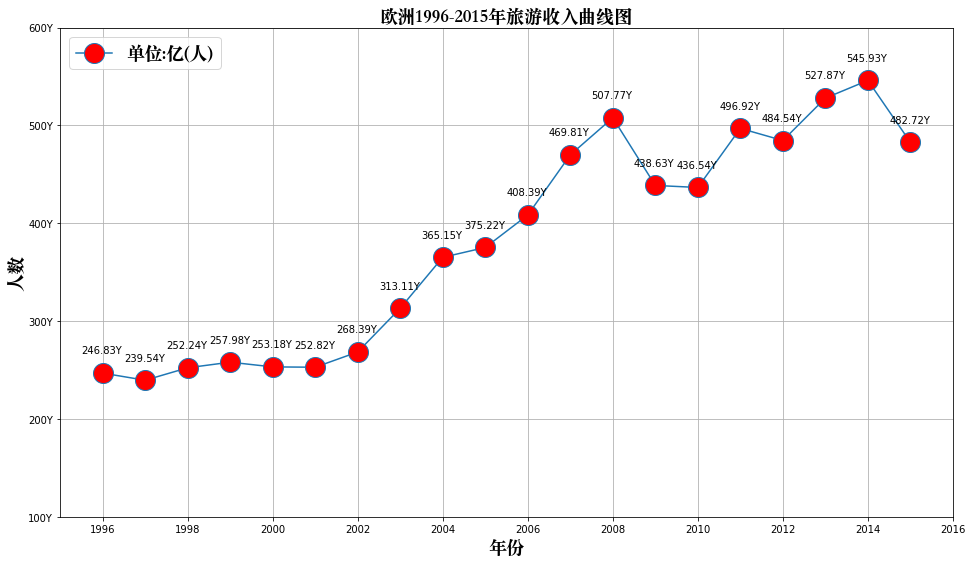

In [52]:
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载字体
font = FontProperties(fname='/Library/Fonts/Songti.ttc', size=18)

# 加载欧洲旅游收入数据
travel_inconme = pd.read_csv(
    '欧洲国家旅游收入近20年数据.csv', 
    skiprows=3, 
    skipfooter=2, 
    engine='python', 
    index_col=0
)

# ----数据准备--------
# 去除所有全部为NaN的数据
travel_inconme.dropna(axis=1, how='all', inplace=True)
# 将所有的NaN替换成0
travel_inconme.fillna(0, inplace=True)
# 轴向旋转
travel_inconme = travel_inconme.stack()

# 分组计算近20年欧洲旅游总收入
income_by_year = travel_inconme.groupby('时间').sum() / 10 ** 11


# ----显示图像----

# 设置图片大小
plt.figure(figsize=(16, 9))

# 绘图
plt.plot(income_by_year, 
         marker='o', 
         markerfacecolor='r', 
         markersize=20
)

# 显示标题
plt.title('欧洲1996-2015年旅游收入曲线图', fontproperties=font, fontsize=20)
plt.ylabel('人数', fontproperties=font)
plt.xlabel('年份', fontproperties=font)

# 设置x轴值区间
plt.xlim(1995, 2016)
# 设置Y轴区间
plt.ylim(1, 6)

plt.xticks([1996 + 2*x for x in range(11)], [1996 + 2*x for x in range(11)])
plt.yticks([1, 2, 3, 4, 5, 6], ['100Y', '200Y', '300Y', '400Y', '500Y', '600Y'])

# 显示图例
plt.legend(['单位:亿(人)'], loc=2, prop=font)

# 显示网格
plt.grid()

# 标识数字标签
for a,b in zip(income_by_year.index, income_by_year.values):
    plt.text(a-0.5, b+0.2, '%1.2fY' % (b * 100))

plt.show()

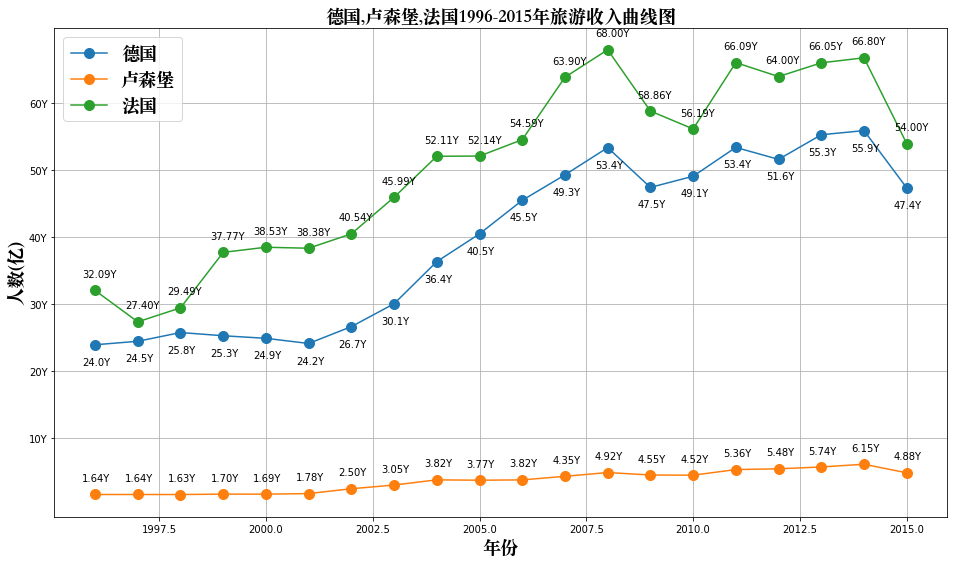

In [53]:
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 加载字体
font = FontProperties(fname='/Library/Fonts/Songti.ttc', size=18)
# for windows
# font = FontProperties(fname='C:\\Windows\\Fonts\\STSONG.TTF')


# 加载欧洲旅游收入数据
travel_inconme = pd.read_csv(
    '欧洲国家旅游收入近20年数据.csv', 
    skiprows=3, 
    skipfooter=2, 
    engine='python', 
    index_col=0
)
# 计算国家
countries = ['德国', '卢森堡', '法国']
# 获取指定国家数据
countries_incomes = travel_inconme[countries] / 10 ** 10

# 设置图片大小
plt.figure(figsize=(16, 9))

# 绘图
plt.plot(countries_incomes, marker='o', markersize=10)
# 显示网格
plt.grid()
# 显示图例
plt.legend(countries_incomes, loc=2, prop=font)

# 显示标题
plt.title('德国,卢森堡,法国1996-2015年旅游收入曲线图', fontproperties=font, fontsize=20)
plt.ylabel('人数(亿)', fontproperties=font)
plt.xlabel('年份', fontproperties=font)

# 显示标签
for a,b in zip(countries_incomes.index, countries_incomes['德国']):
    plt.text(a-0.3, b-0.3, '%1.1fY' % (b * 10))
    
for a,b in zip(countries_incomes.index, countries_incomes['卢森堡']):
    plt.text(a-0.3, b+0.2, '%1.2fY' % (b * 10))

for a,b in zip(countries_incomes.index, countries_incomes['法国']):
    plt.text(a-0.3, b+0.2, '%1.2fY' % (b * 10))

# 设置y轴刻度
plt.yticks([1, 2, 3, 4, 5, 6], ['10Y', '20Y', '30Y', '40Y', '50Y', '60Y'])

plt.show()